The following script is used to check which version of scikit-learn is installed, which is crucial for ensuring compatibility with various functions and features since different versions of the library might have different functionalities or requirements.

In [1]:
import sklearn as s
s.__version__

'1.0.2'

## yellowbrick 
It is a Python library designed to extend the scikit-learn library with visual analysis and diagnostic tools in the context of machine learning. The command pip install yellowbrick is used to install the Yellowbrick library in your Python environment. Here's a more detailed look at what Yellowbrick is and why it's used:

What is Yellowbrick?
Yellowbrick is an open-source, diagnostic visualization library that is built on top of Matplotlib, a comprehensive library for creating static, animated, and interactive visualizations in Python. Yellowbrick extends scikit-learn and Matplotlib to allow for the creation of informative visualizations that can aid in the machine learning model selection process and the interpretation of machine learning models.

Why is Yellowbrick Used?
Model Evaluation: Yellowbrick provides tools to visually evaluate the performance, stability, and predictive value of machine learning models. Through its visualizations, it helps in identifying issues like overfitting or underfitting, and in comparing the performance of different models.

Feature Analysis: It offers visualizations to understand the relationship between features and the target variable, and to identify the importance or relevance of different features in the predictive models.

Model Selection: Yellowbrick assists in the model selection process by providing visual tools to compare the performance of different algorithms and to tune hyperparameters.

Algorithm Selection: It helps in visualizing the behavior of different algorithms on the dataset, aiding in the selection of the most appropriate algorithm for a specific problem.

Ease of Use: By integrating closely with scikit-learn, Yellowbrick provides a user-friendly interface for creating complex visualizations with relatively simple code, making it accessible to both novice and experienced data scientists.

In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


# Library Description:

- This code snippet is a comprehensive setup for a data analysis and clustering task, often used in data science projects. It imports necessary libraries, sets some Pandas display options, and prepares clustering and visualization tools. Let's break down the components and their purposes:

- Code Structuring and Environment Preparation:
  1. %load_ext nb_black: This line is a magic command to load the nb_black extension, which automatically formats     the code in a Jupyter notebook, ensuring it's well-structured and readable.
 
- Data Manipulation Libraries:
  1. import numpy as np: Imports NumPy, a fundamental package for scientific computing in Python, providing support   for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on   these arrays.
  2. import pandas as pd: Imports Pandas, a library providing high-performance, easy-to-use data structures, and     data analysis tools for Python.

- Data Visualization Libraries:
  1. import matplotlib.pyplot as plt and import seaborn as sns: These lines import Matplotlib and Seaborn, two       Python libraries for data visualization. Seaborn is built on top of Matplotlib and offers a higher-level           interface for drawing attractive and informative statistical graphics.
  2. sns.set_theme(): Sets the theme for Seaborn plots to the default theme.

- Pandas Display Options:
  1. pd.set_option("display.max_columns", None): Ensures that all columns of a DataFrame are displayed.
  2. pd.set_option("display.max_rows", 200): Sets the maximum number of rows to be displayed to 200.

- Preprocessing and Clustering Libraries:
  1. StandardScaler: A tool from scikit-learn for standardizing features by removing the mean and scaling to unit     variance.
  2. KMeans: A module to perform K-Means clustering.
  3. AgglomerativeClustering: A module for hierarchical clustering using an agglomerative approach.
  4. PCA: Principal Component Analysis module for dimensionality reduction.
  
- Distance and Linkage Computation:
  pdist, cdist, linkage, cophenet: Functions from SciPy to compute pairwise distances and perform hierarchical       clustering.

- Visualization Tools from Yellowbrick:
  KElbowVisualizer, SilhouetteVisualizer: These classes from Yellowbrick assist in visualizing the K-Elbow method     and the silhouette scores, respectively, which are crucial for determining the optimal number of clusters in       data.

- Yellowbrick is specifically used here for its specialized visualizers for cluster analysis. KElbowVisualizer helps in identifying the optimal number of clusters by displaying the elbow method graphically, which is useful in K-Means clustering. SilhouetteVisualizer displays the silhouette scores of each cluster, providing insight into the separation distance between the resulting clusters, which is key for assessing the quality of clustering.

In [3]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform k-means clustering, compute metric
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA

In [4]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

In [5]:
# Determine dimension of dataframe
data.shape

(340, 15)

The data frame has 340 rows and 15 columns 

In [6]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [7]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [8]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [9]:
#fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

The line of code df.columns = [c.replace(" ", "_") for c in df.columns] is intended to replace spaces with underscores in the column names of the DataFrame df

In [10]:
# Ticker_Symbol is an abbreviation to identify the stocks, and is not required for further analysis
# Dropping Ticker Symbol
df.drop("Ticker_Symbol", axis=1, inplace=True)

In [11]:
# lets check duplicate observations
df.duplicated().sum()

0

The output 0 indicates that there are no duplicate observations in the DataFrame.

In [12]:
# lets check total null values 
df.isnull().sum().sum()

0

The output 0 indicates that there are no missing (null) values in the DataFrame.

In [13]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price_Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash_Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net_Cash_Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0
Net_Income,340.0,NaN,NaN,NaN,1494384602.941176,3940150279.327937,-23528000000.0,352301250.0,707336000.0,1899000000.0,24442000000.0


- No security/ company is repeated twice
- There are 11 unique GICS_Sector, and Industrials is the most common of the same
- There are 104 unique GICS_Sub_Industry, and Oil & Gas Exploration & Production is the most common of the same
- The average Current_Price is $80.86 while the median Current_Price is $59.75. This indicates data is right skewed   with some high outliers
- The average Price_Change (% change in price in the last 13 weeks) & average Volatility (Std deviation of price     over last 13 weeks) are $4.078 and 1.5 while the median values are $4.819 and 1.38
- Average ROE (return on equity) is 39.59 while the median ROE is only 15. This indicates data is right skewed with   some outliers. A higher ROE indicates that a company is able to generate higher profits without needing much       capital and is prefered by investors
- Cash ratio is a measure of the company to pay off short term liabilities with cash & cash equivilaents. While a     high cash ratio is prefered by investors, a very high cash ratio, may also indicate that cash is not being re       invested or is not returning further interest. The average is 70.2 and median is 47
- The average Net_Cash_Flow is $55537620 while median Net_Cash_Flow is $2098000.0 (right skewed, high outliers)
- The average Net_Income is $1494384602.941176 while median Net_Income is $707336000.0 (again right skewed, high     outliers). The Net Cash flow is the amount of money that actually comes in and goes out of a business during a     period of time. Net income is the profit or loss that a business has after subtracting all expenses from the       total revenue. Higher value of both is prefered
- The average Earnings_Per_Share (net profit/shares outstanding) is 2.77 while median is 2.895 (left skewed)
- The average Estimated_Shares_Outstanding is 577028337.754029 while median is 309675137.8 (right skewed with         outliers)
- The average P/E , P/B ratio are 32.61 and -1.7 while median values are 20.8 and -1.06 respectively. P/E and P/B     are the ratio of company's stock price per share by earnings per share & by (total assets - total liabilities)     per share. 
- The average P/B ratio being negative indicates there are some companies in serious financial stress with           liabilities exceeding assets (left skewed)

## EDA

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

This function, histogram_boxplot, is designed to create a combined plot that includes both a histogram and a boxplot for a given feature (column) from a DataFrame. Here is a breakdown of what each line in the function does:

1. def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

This line defines the function with the name histogram_boxplot. It takes several parameters:
data: The DataFrame containing the data.
feature: The specific column in the DataFrame for which the histogram and boxplot are to be created.
figsize: A tuple that defines the size of the figure. It defaults to (12, 7) if not specified.
kde: A boolean that indicates whether to show a Kernel Density Estimate (KDE) on the histogram. It defaults to False.
bins: The number of bins to use for the histogram. It defaults to None, meaning that the default number of bins will be used.

2. f2, (ax_box2, ax_hist2) = plt.subplots(...)

This line creates a subplot layout of 2 rows for the boxplot and histogram.
nrows=2 indicates that there will be two rows of subplots.
sharex=True means the two plots will share the same x-axis.
gridspec_kw={"height_ratios": (0.25, 0.75)} sets the ratio of the heights for the boxplot and histogram plots, respectively.
figsize=figsize sets the overall size of the combined figure based on the figsize parameter.

3. sns.boxplot(...)

This line creates a boxplot for the specified feature on the ax_box2 axis.
data=data specifies the DataFrame source.
x=feature sets the column to be plotted.
ax=ax_box2 places the boxplot in the first (top) subplot.
showmeans=True adds a mean marker to the boxplot.
color="violet" sets the color of the boxplot.

4. sns.histplot(...) if bins else sns.histplot(...)

These lines create a histogram for the specified feature.
They use a conditional statement to decide whether to pass the bins parameter.
data=data and x=feature set the DataFrame and column.
kde=kde includes or excludes the KDE based on the kde parameter.
ax=ax_hist2 places the histogram in the second (bottom) subplot.
bins=bins sets the number of bins if bins is provided.
palette="winter" is likely an error since palette is not a valid parameter for sns.histplot. This should either be removed or replaced with the correct parameter if color customization is needed.
 
5. ax_hist2.axvline(...)

These lines add vertical lines to the histogram to indicate the mean and median of the distribution.
data[feature].mean() and data[feature].median() calculate the mean and median of the feature.
color="green" sets the color of the mean line to green, and color="black" sets the color of the median line to black.
linestyle="--" makes the mean line dashed, and linestyle="-" makes the median line solid.

This function is a convenient way to visualize the distribution and central tendency of a dataset's feature, providing both the spread of the data as seen in the boxplot and the distribution as seen in the histogram.

In [15]:
# Select and list all numerical columns from the dataframe
num_cols = df.select_dtypes(include=np.number).columns.tolist()

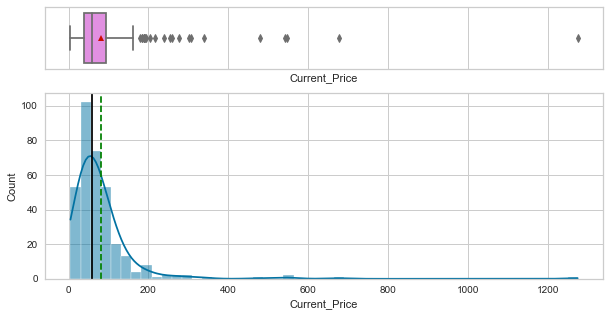

In [16]:
histogram_boxplot(df, num_cols[0], bins=50, kde=True, figsize=(10, 5))

- The histogram has a right-skewed distribution, meaning there are a few higher-value outliers pulling the tail of the distribution to the right.
- The blue curve represents the kernel density estimate (KDE), which is a smoothed version of the histogram and gives an estimate of the probability density function of the variable. The KDE curve also shows a peak that is to the left of the histogram, indicating the mode of the data is less than the mean.
- The dashed green vertical line represents the mean of the "Current Price", and the solid black line represents the median. The fact that the mean is to the right of the median further confirms the right skewness of the distribution.
- Overall, the plot indicates that while most of the stock prices are clustered at lower values (as seen by the dense grouping of histogram bars to the left), there are a number of stocks with much higher prices that are affecting the mean and creating a long right tail in the distribution.

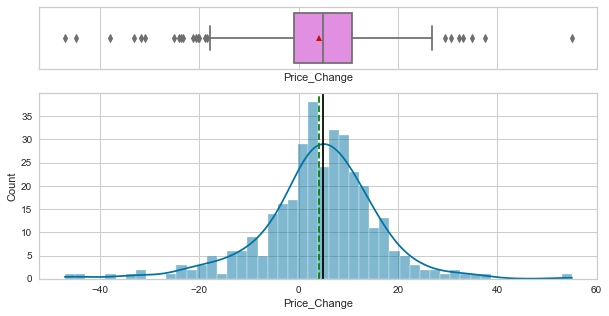

In [17]:
histogram_boxplot(df, num_cols[1], bins=50, kde=True, figsize=(10, 5))

- In this case, there are several outliers on both sides of the box, indicating instances where the price change was exceptionally high or low compared to the rest of the data.
- A KDE (Kernel Density Estimate) line is overlaid on the histogram, providing a smooth estimate of the distribution.
- The distribution appears roughly symmetric around the median, with a slight right skewness given the tail extending towards the higher values of "Price_Change".
- The dashed green line indicates the mean of the "Price_Change", which appears to be very close to the median (solid black line), suggesting that the distribution is relatively symmetric.
- Overall, this plot indicates that while there is some variability in the "Price_Change" with outliers on both ends, the bulk of the changes are concentrated around the median, with no significant skewness to the distribution.
- This could be indicative of a stable market condition during the period measured, with a few exceptional cases of significant price changes.

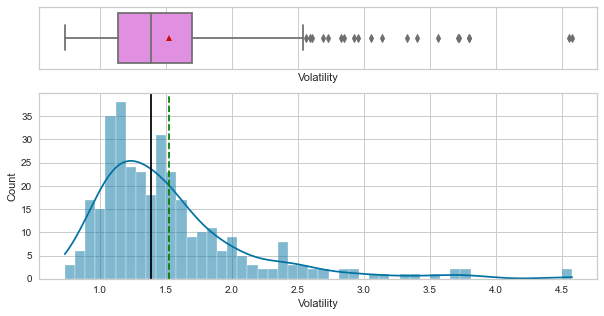

In [18]:
histogram_boxplot(df, num_cols[2], bins=50, kde=True, figsize=(10, 5))

- Data points outside of the whiskers are outliers, shown as individual points, indicating that there are stocks with volatility significantly higher than the bulk of the data in the boxplot.
- A right skew is noticeable, with a longer tail on the right side, indicating that there are stocks with higher volatility values that are less common.
- The Kernel Density Estimate (KDE) line, shown in blue, gives a smooth probability density function of the volatility, peaking around the most frequent values.
- The green dashed line indicates the mean volatility, and the solid black line shows the median.
- The close proximity of the mean and median suggests a moderate skew in the data, and the presence of outliers on the right side of the boxplot confirms this skewness.
- The distribution's skewness suggests that while most stocks have a similar volatility, a few have much higher volatility, which might be important when assessing risk in an investment portfolio.

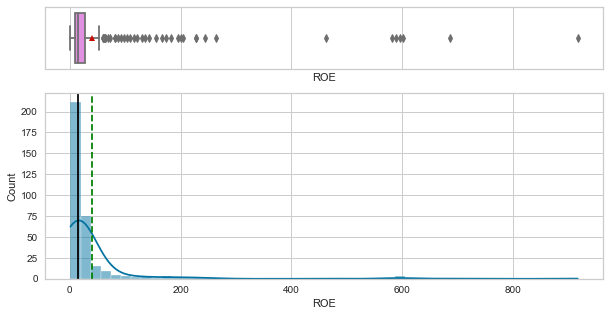

In [19]:
histogram_boxplot(df, num_cols[3], bins=50, kde=True, figsize=(10, 5))

- There are several outliers on the right, which indicates that a few companies have exceptionally high ROE values compared to the rest in the boxplot.
- The distribution is highly right-skewed, with most companies having a lower ROE, while a few have very high ROE.
- The KDE line, plotted over the histogram, emphasizes the skewness by showing a peak near the lower ROE values and a long tail extending to the right.
- The green dashed line indicates the mean ROE, which is to the right of the median, emphasizing the skewness caused by high ROE values.
- Overall, the plot suggests that while most companies have a relatively low to moderate ROE, there are some with significantly higher values, which may be of interest for investors seeking high returns on equity. However, extremely high ROE values could also warrant further investigation to understand the reasons behind them, as they could be due to one-time events, accounting practices, or other factors that may not be sustainable.

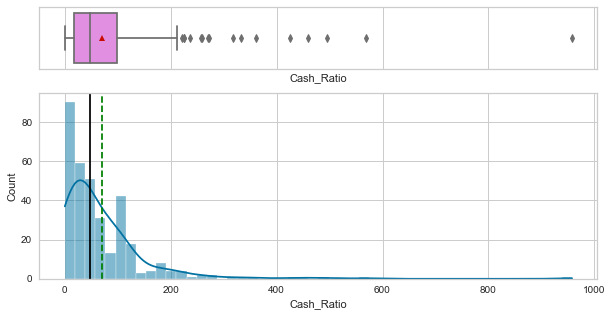

In [20]:
histogram_boxplot(df, num_cols[4], bins=50, kde=True, figsize=(10, 5))

- There are numerous outliers, which are the individual points beyond the whiskers of the boxplot, indicating that some companies have a much higher cash ratio than typical.
- Most companies are concentrated in a range close to zero, as evidenced by the high peak there.
- The distribution shows a long tail to the right, suggesting that while most companies have a low cash ratio, a few have very high values.
- The KDE line, which provides a smoothed estimate of the distribution, confirms the right skewness of the data.

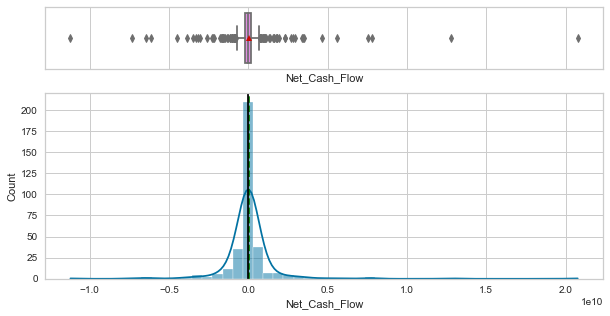

In [21]:
histogram_boxplot(df, num_cols[5], bins=50, kde=True, figsize=(10, 5))

- The boxplot indicates that the median is very close to zero, with a relatively symmetric distribution of values within the interquartile range. The whiskers extend to include most of the data, but there are several outliers on both ends, suggesting some companies with unusually high or low cash flows.
- The histogram below shows a distribution that is concentrated near zero with a sharp peak, suggesting that most companies have a net cash flow around zero. The distribution has a long tail, likely due to a few companies with very high net cash flow, which can be seen as outliers in the boxplot.

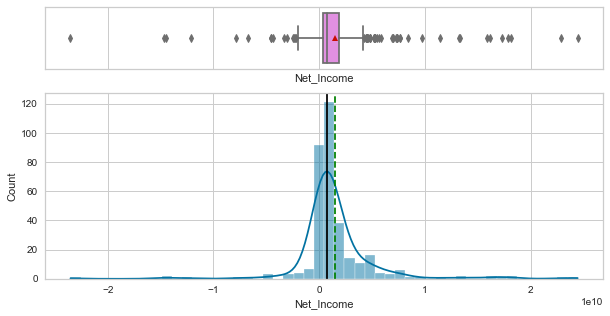

In [22]:
histogram_boxplot(df, num_cols[6], bins=50, kde=True, figsize=(10, 5))

- The boxplot again shows the median close to zero, with an interquartile range that is more compact than that of the net cash flow. There are many outliers, especially on the positive side, indicating companies with exceptionally high net income.
- The histogram reveals a sharp peak near zero, and a long tail extending to the right. The KDE line suggests a distribution that is skewed to the right, meaning there are some companies with high net income values, but the majority have net incomes close to zero.

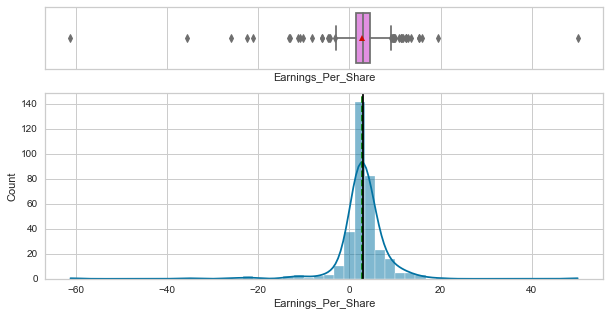

In [23]:
histogram_boxplot(df, num_cols[7], bins=50, kde=True, figsize=(10, 5))

- The boxplot for EPS likely shows the median very close to zero with some outliers, which are represented by points far from the box. If the median is close to zero, it suggests that the average company in the dataset doesn't make much profit or loss per share.
- The histogram may display a peak near zero with a long tail, which suggests a right-skewed distribution. This would indicate that while most companies have low earnings per share, a few have very high values.

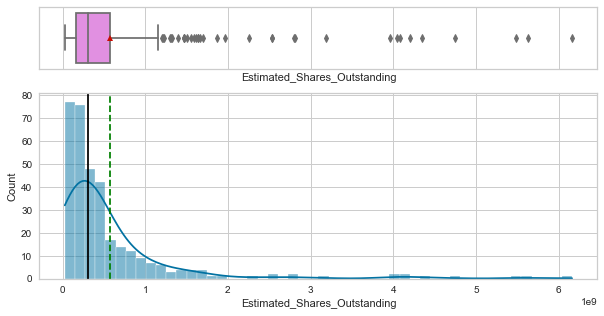

In [24]:
histogram_boxplot(df, num_cols[8], bins=50, kde=True, figsize=(10, 5))

- The boxplot for this metric probably shows a relatively narrow IQR, with a median that might be close to the lower quartile if there's a right skew. Outliers might be present, suggesting that some companies have a significantly larger number of shares outstanding.
- The histogram for shares outstanding would typically show the distribution of shares across the companies. If there's a peak near the lower range and a long tail to the right, it indicates that most companies have fewer shares, but a few have a very high count.

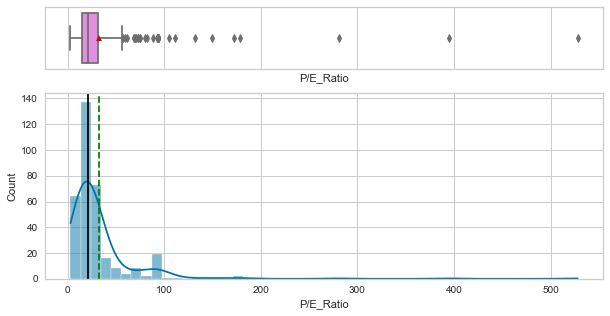

In [25]:
histogram_boxplot(df, num_cols[9], bins=50, kde=True, figsize=(10, 5))

- The boxplot indicates a median close to zero with a compact interquartile range, suggesting that most companies have a low P/E ratio.
- There are a significant number of outliers, which suggests that some companies have unusually high P/E ratios.
- The histogram shows that the distribution of P/E ratios is highly skewed to the right, with most companies concentrated in a lower range and a few companies having very high P/E ratios.

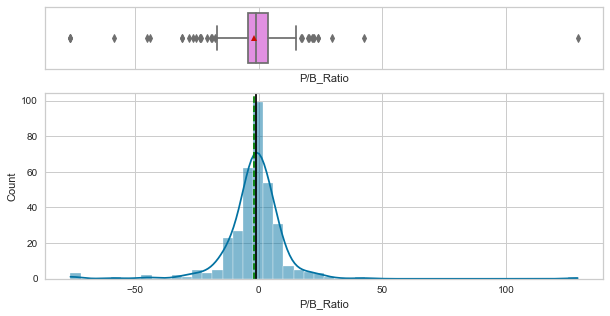

In [26]:
histogram_boxplot(df, num_cols[10], bins=50, kde=True, figsize=(10, 5))

- The boxplot again shows a median close to zero, with some outliers indicating the presence of companies with exceptionally high or low P/B ratios.
- The histogram shows a right-skewed distribution, with most of the companies having a P/B ratio close to zero and fewer companies having higher values.

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

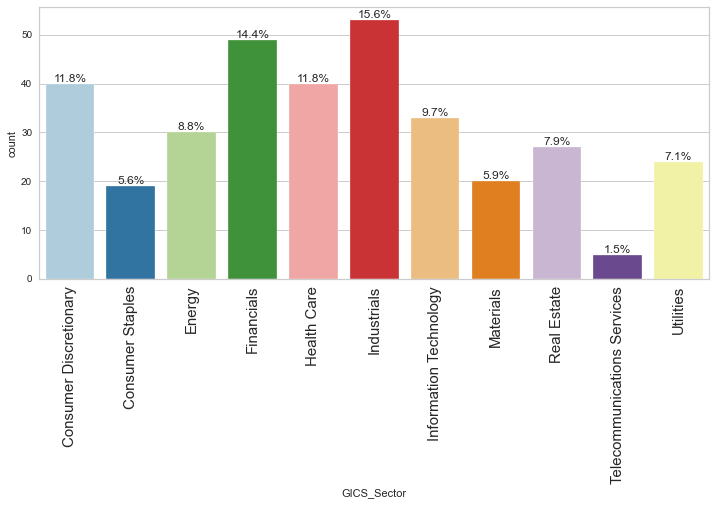

In [28]:
labeled_barplot(df, "GICS_Sector", perc=True)

- Here’s a breakdown of the function:

data: The DataFrame that contains the data.
feature: The column within the DataFrame that you want to create the bar plot for. This should be a categorical variable.
perc: A boolean that specifies whether to show the percentage of each category (True) or the count of each category (False) on the bar labels.
n: This argument allows you to limit the plot to the top n most frequent categories.
Inside the function:

It calculates the total number of entries in the specified feature.
It checks if n is provided. If not, it sets the figure size based on the unique number of categories in feature.
It rotates the x-axis labels to avoid overlap.
It uses Seaborn’s countplot to create the bar plot, optionally sorting the bars by frequency and limiting the number to n.
It loops through the bars (ax.patches) and calculates the appropriate label based on the perc argument.
Each label is annotated on the bar, with some offset to avoid overlap with the bar itself.
Finally, it displays the plot with plt.show().


- Majority of the securities belong to "Industries" GICS Sector and minority to "Telecommunication Services"


In [29]:
## Create a cross-tabulation to see the frequency distribution of sub-industries within each sector
# Then highlight the maximum value in each row (sub-industry) with lightgreen color
pd.crosstab(df.GICS_Sub_Industry, df.GICS_Sector).style.highlight_max(
    color="lightgreen", axis=0
)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
GICS_Sub_Industry,,,,,,,,,,,
Advertising,2,0,0,0,0,0,0,0,0,0,0
Aerospace & Defense,0,0,0,0,0,4,0,0,0,0,0
Agricultural Products,0,1,0,0,0,0,0,0,0,0,0
Air Freight & Logistics,0,0,0,0,0,3,0,0,0,0,0
Airlines,0,0,0,0,0,5,0,0,0,0,0
Alternative Carriers,0,0,0,0,0,0,0,0,0,1,0
"Apparel, Accessories & Luxury Goods",1,0,0,0,0,0,0,0,0,0,0
Application Software,0,0,0,0,0,0,2,0,0,0,0
Asset Management & Custody Banks,0,0,0,4,0,0,0,0,0,0,0


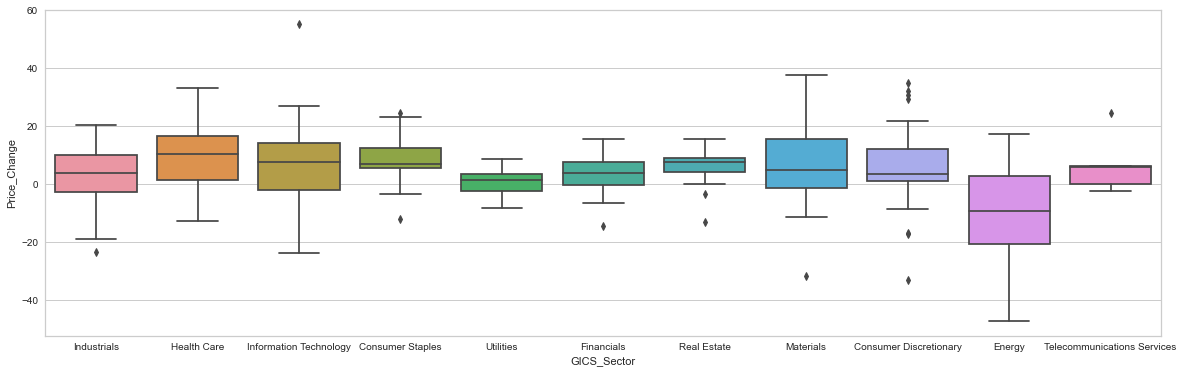

In [30]:
# Bivariate analysis
# Stock Price_Change Vs. GICS_Sector

plt.figure(figsize=(20,6))
sns.boxplot(data = df, y = "Price_Change", x = "GICS_Sector");

- Real_Estate has seen the minimum variation in Price_Change across different securities it encompasses while Energy GICS_Sector has seen the maximum variation in Price_Change across its securities
- Healthcare and Information Technology have maximum number of securities with a high positive Price_Change making them more favorable

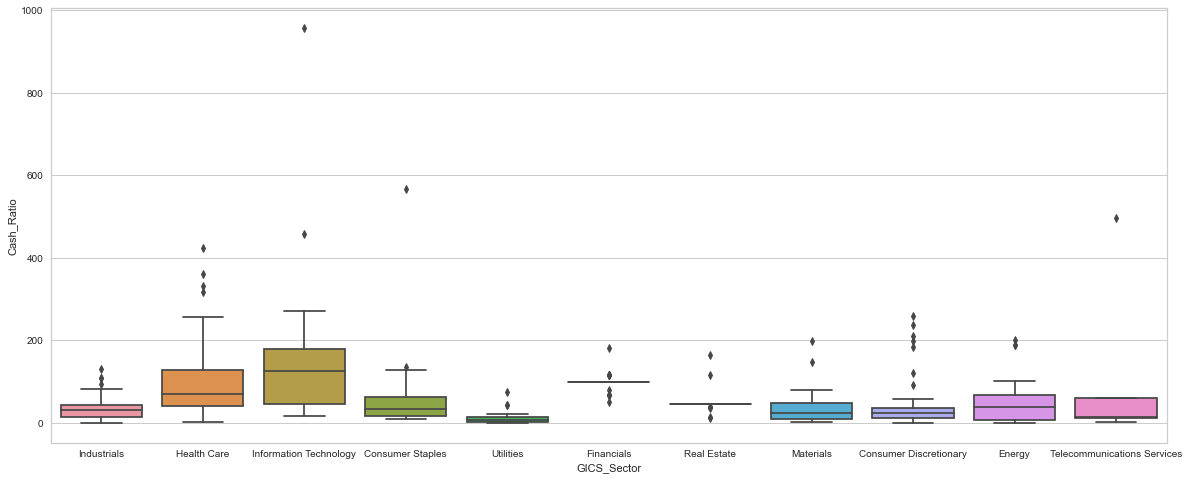

In [31]:
# Cash_Ratio Vs. GICS_Sector

plt.figure(figsize=(20,8))
sns.boxplot(data = df, y = "Cash_Ratio", x = "GICS_Sector");

- Real_Estate and Financials have the minimum Cash_Ratio variance across securities/companies in the respective GICS_sector while Informational Technology and Health Care have the maximum Cash_Ratio variance
- Informational_Sector and Financials also have high median Cash_Ratios in comparison to other GICS_Sectors; Informational_Technology has some of the highest positive outliers for Cash_Ratio

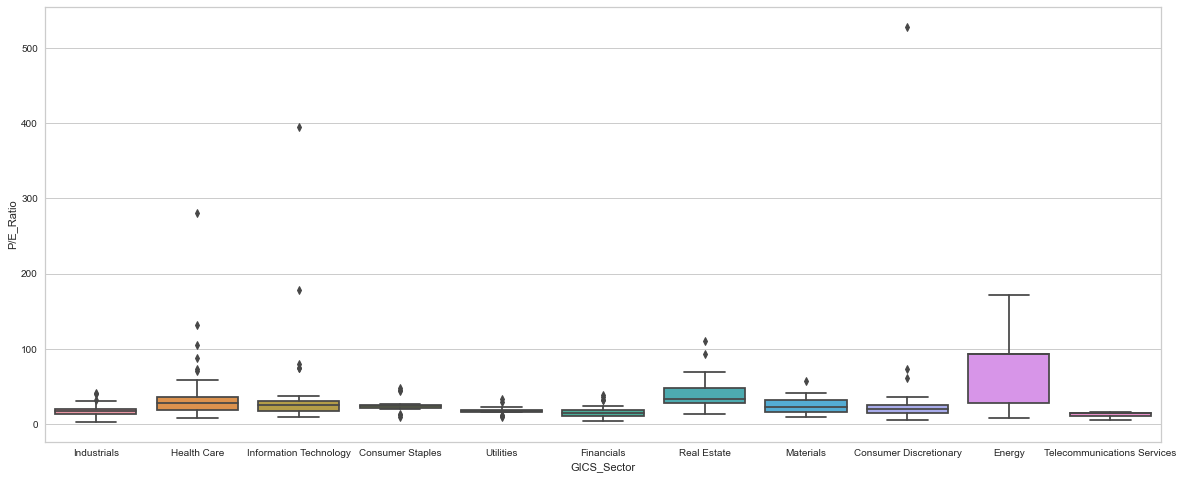

In [32]:
# P/E_Ratio Vs. GICS_Sector

plt.figure(figsize=(20,8))
sns.boxplot(data = df, y = "P/E_Ratio", x = "GICS_Sector");

- Energy GICS_Sector has some of the highest variance in P/E ratios as well has some securities/companies with high P/E ratios. This indicates an investor is willing to invest more in a single share of a company in this sector per dollar of its earnings as opposed to securities/companies in other GICS_Sectors

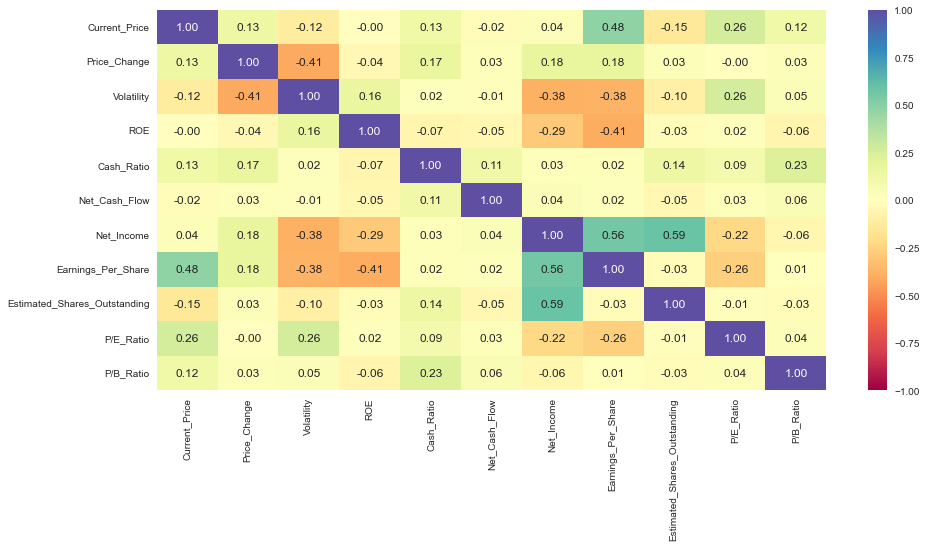

In [33]:
# check for correlations

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Price_Change has a negative correlation with Volatility (standard devaition of stock price, accounting for any big swings in price in either direction over the period). This indicates that more volatile the stocks, more 'negative' the Price_Change
- Earnings_Per_Share has a positive correlation with Current_Price & Net_Income
- Estimated_Shares_Outstanding has a positive correlation with Net_Income
- Earnings_Per_Share has a negative correlation with ROE and Volatility

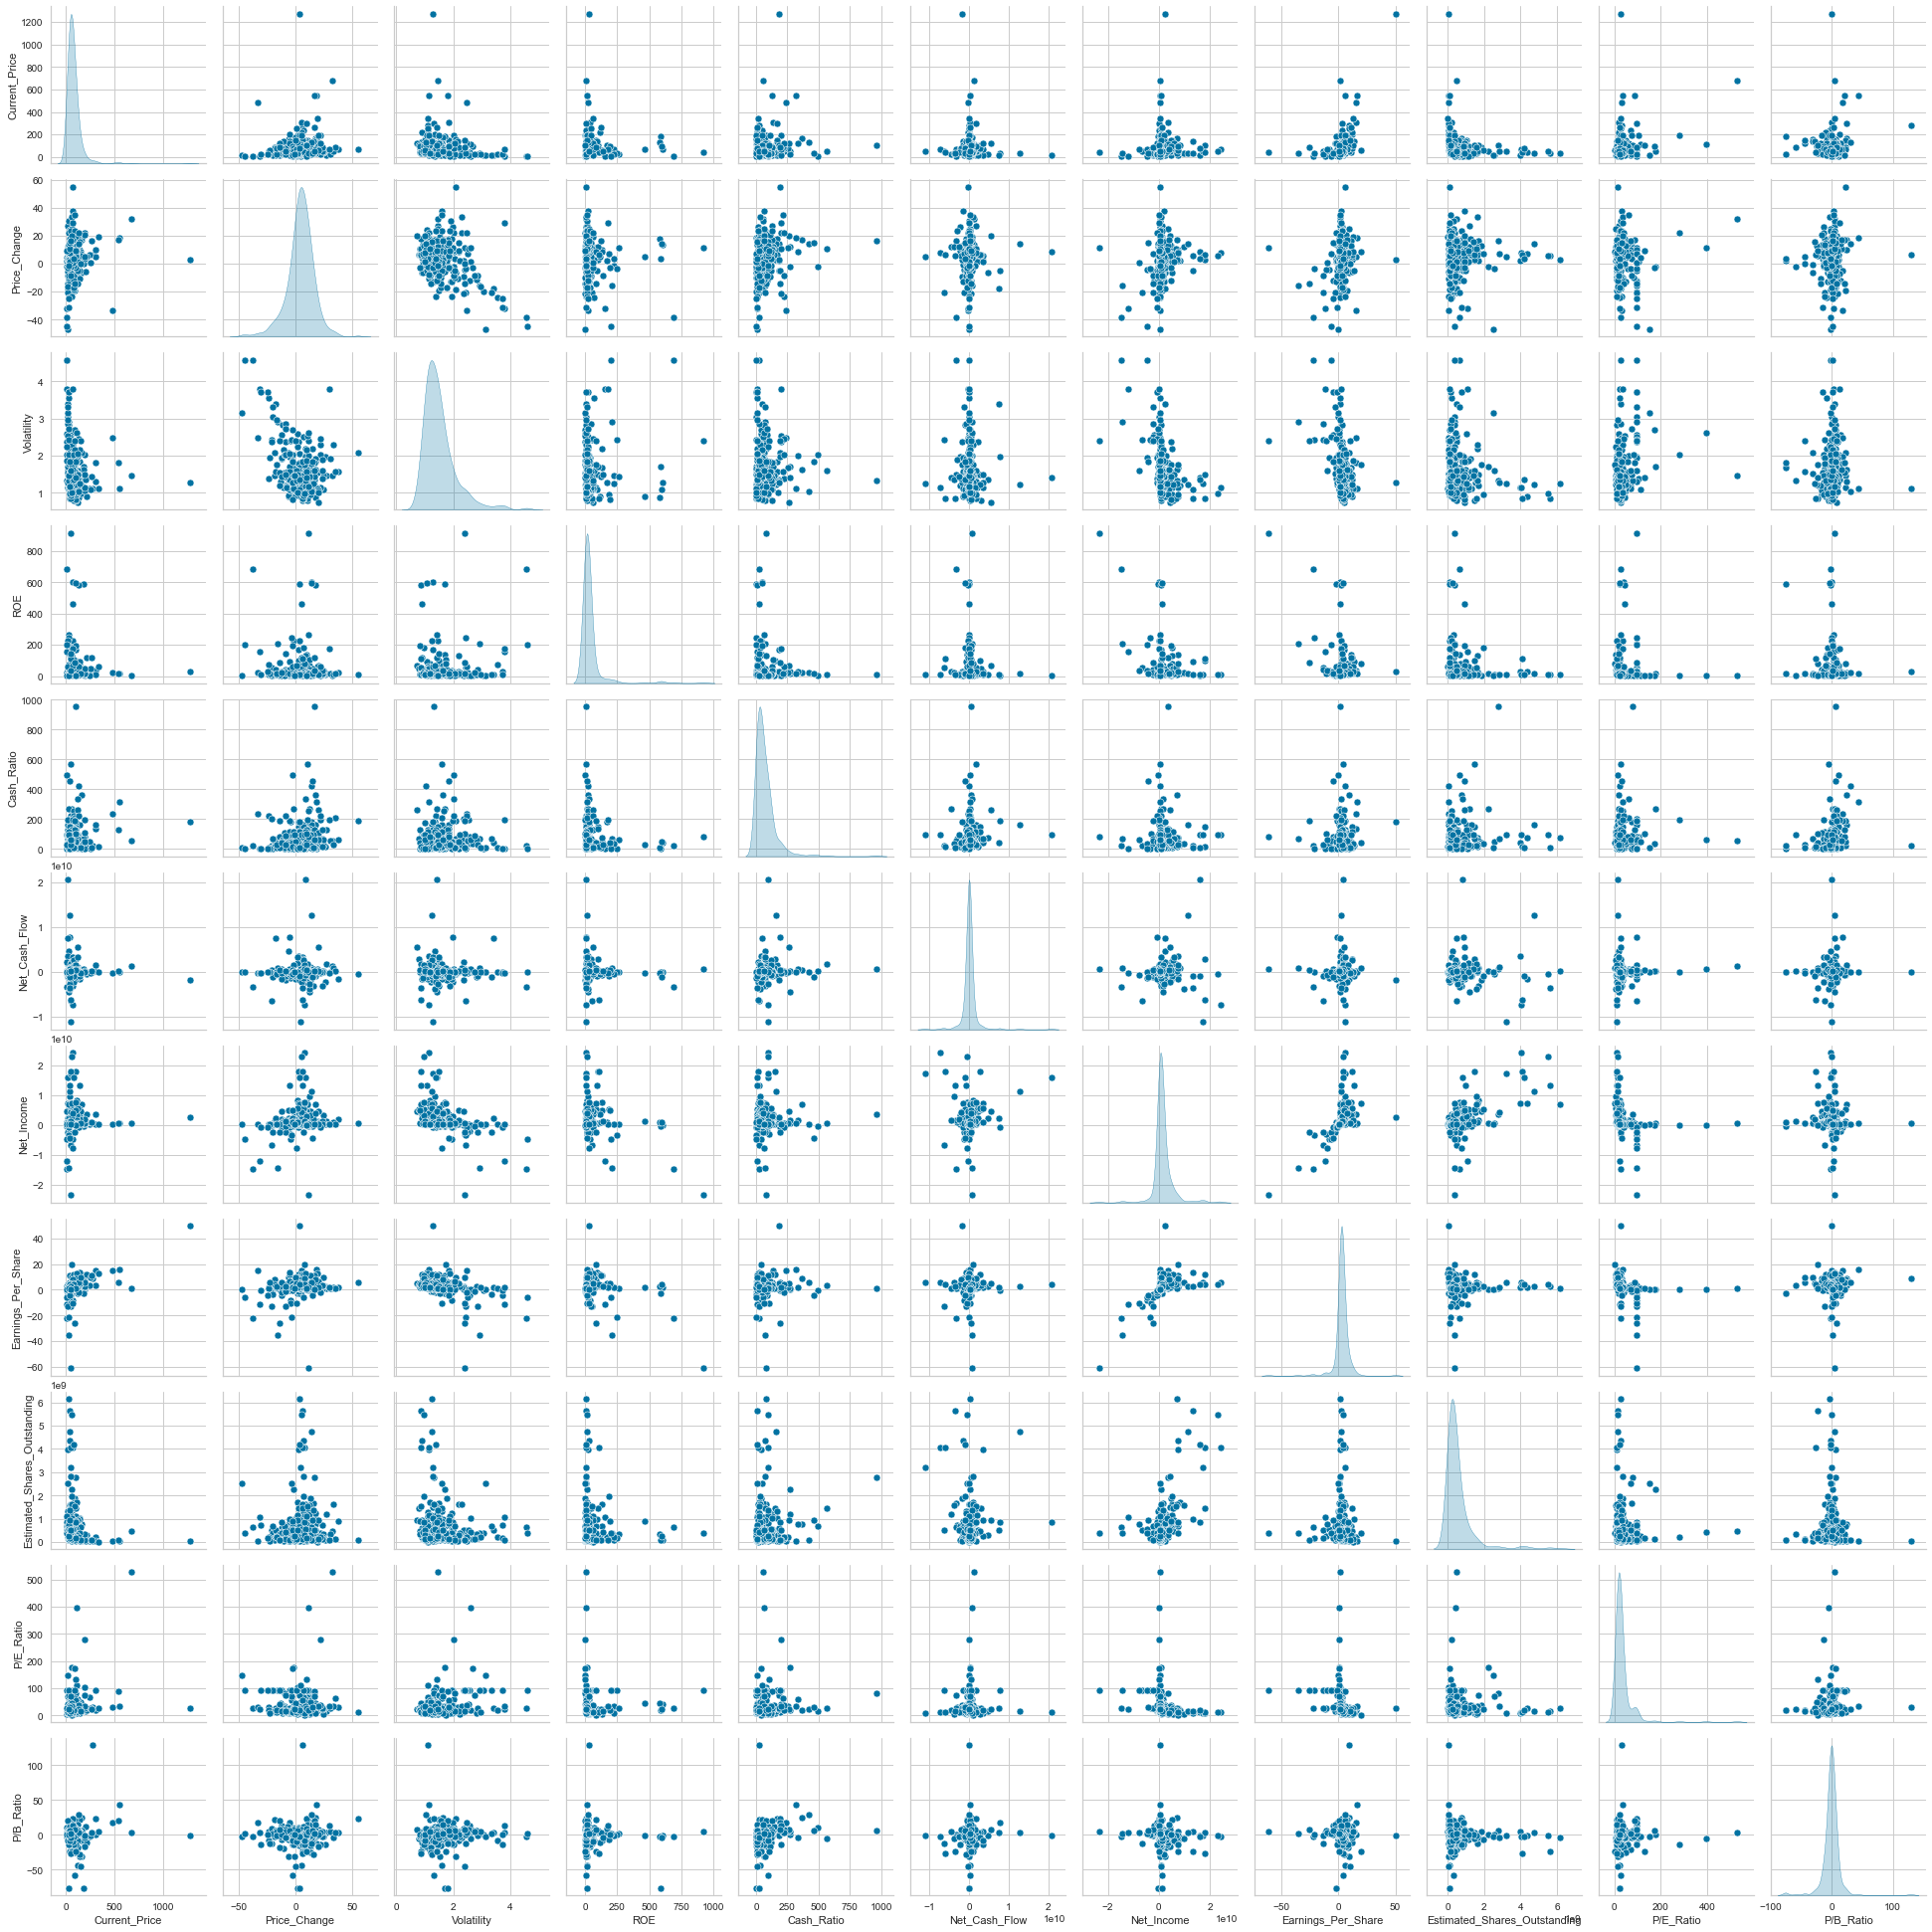

In [34]:
# Pair-plot analysis

sns.pairplot(df[num_cols],diag_kind="kde");

- P/E_Ratio is bimodal; Volatility is trimodal. Most other distributions have somewhat of a normal distribution

## Data Preprocessing

In [35]:
# Scaling the data to bring it to the same scale 

sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis=1)),
    columns=df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis=1).columns,
)
subset_scaled_df.head()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


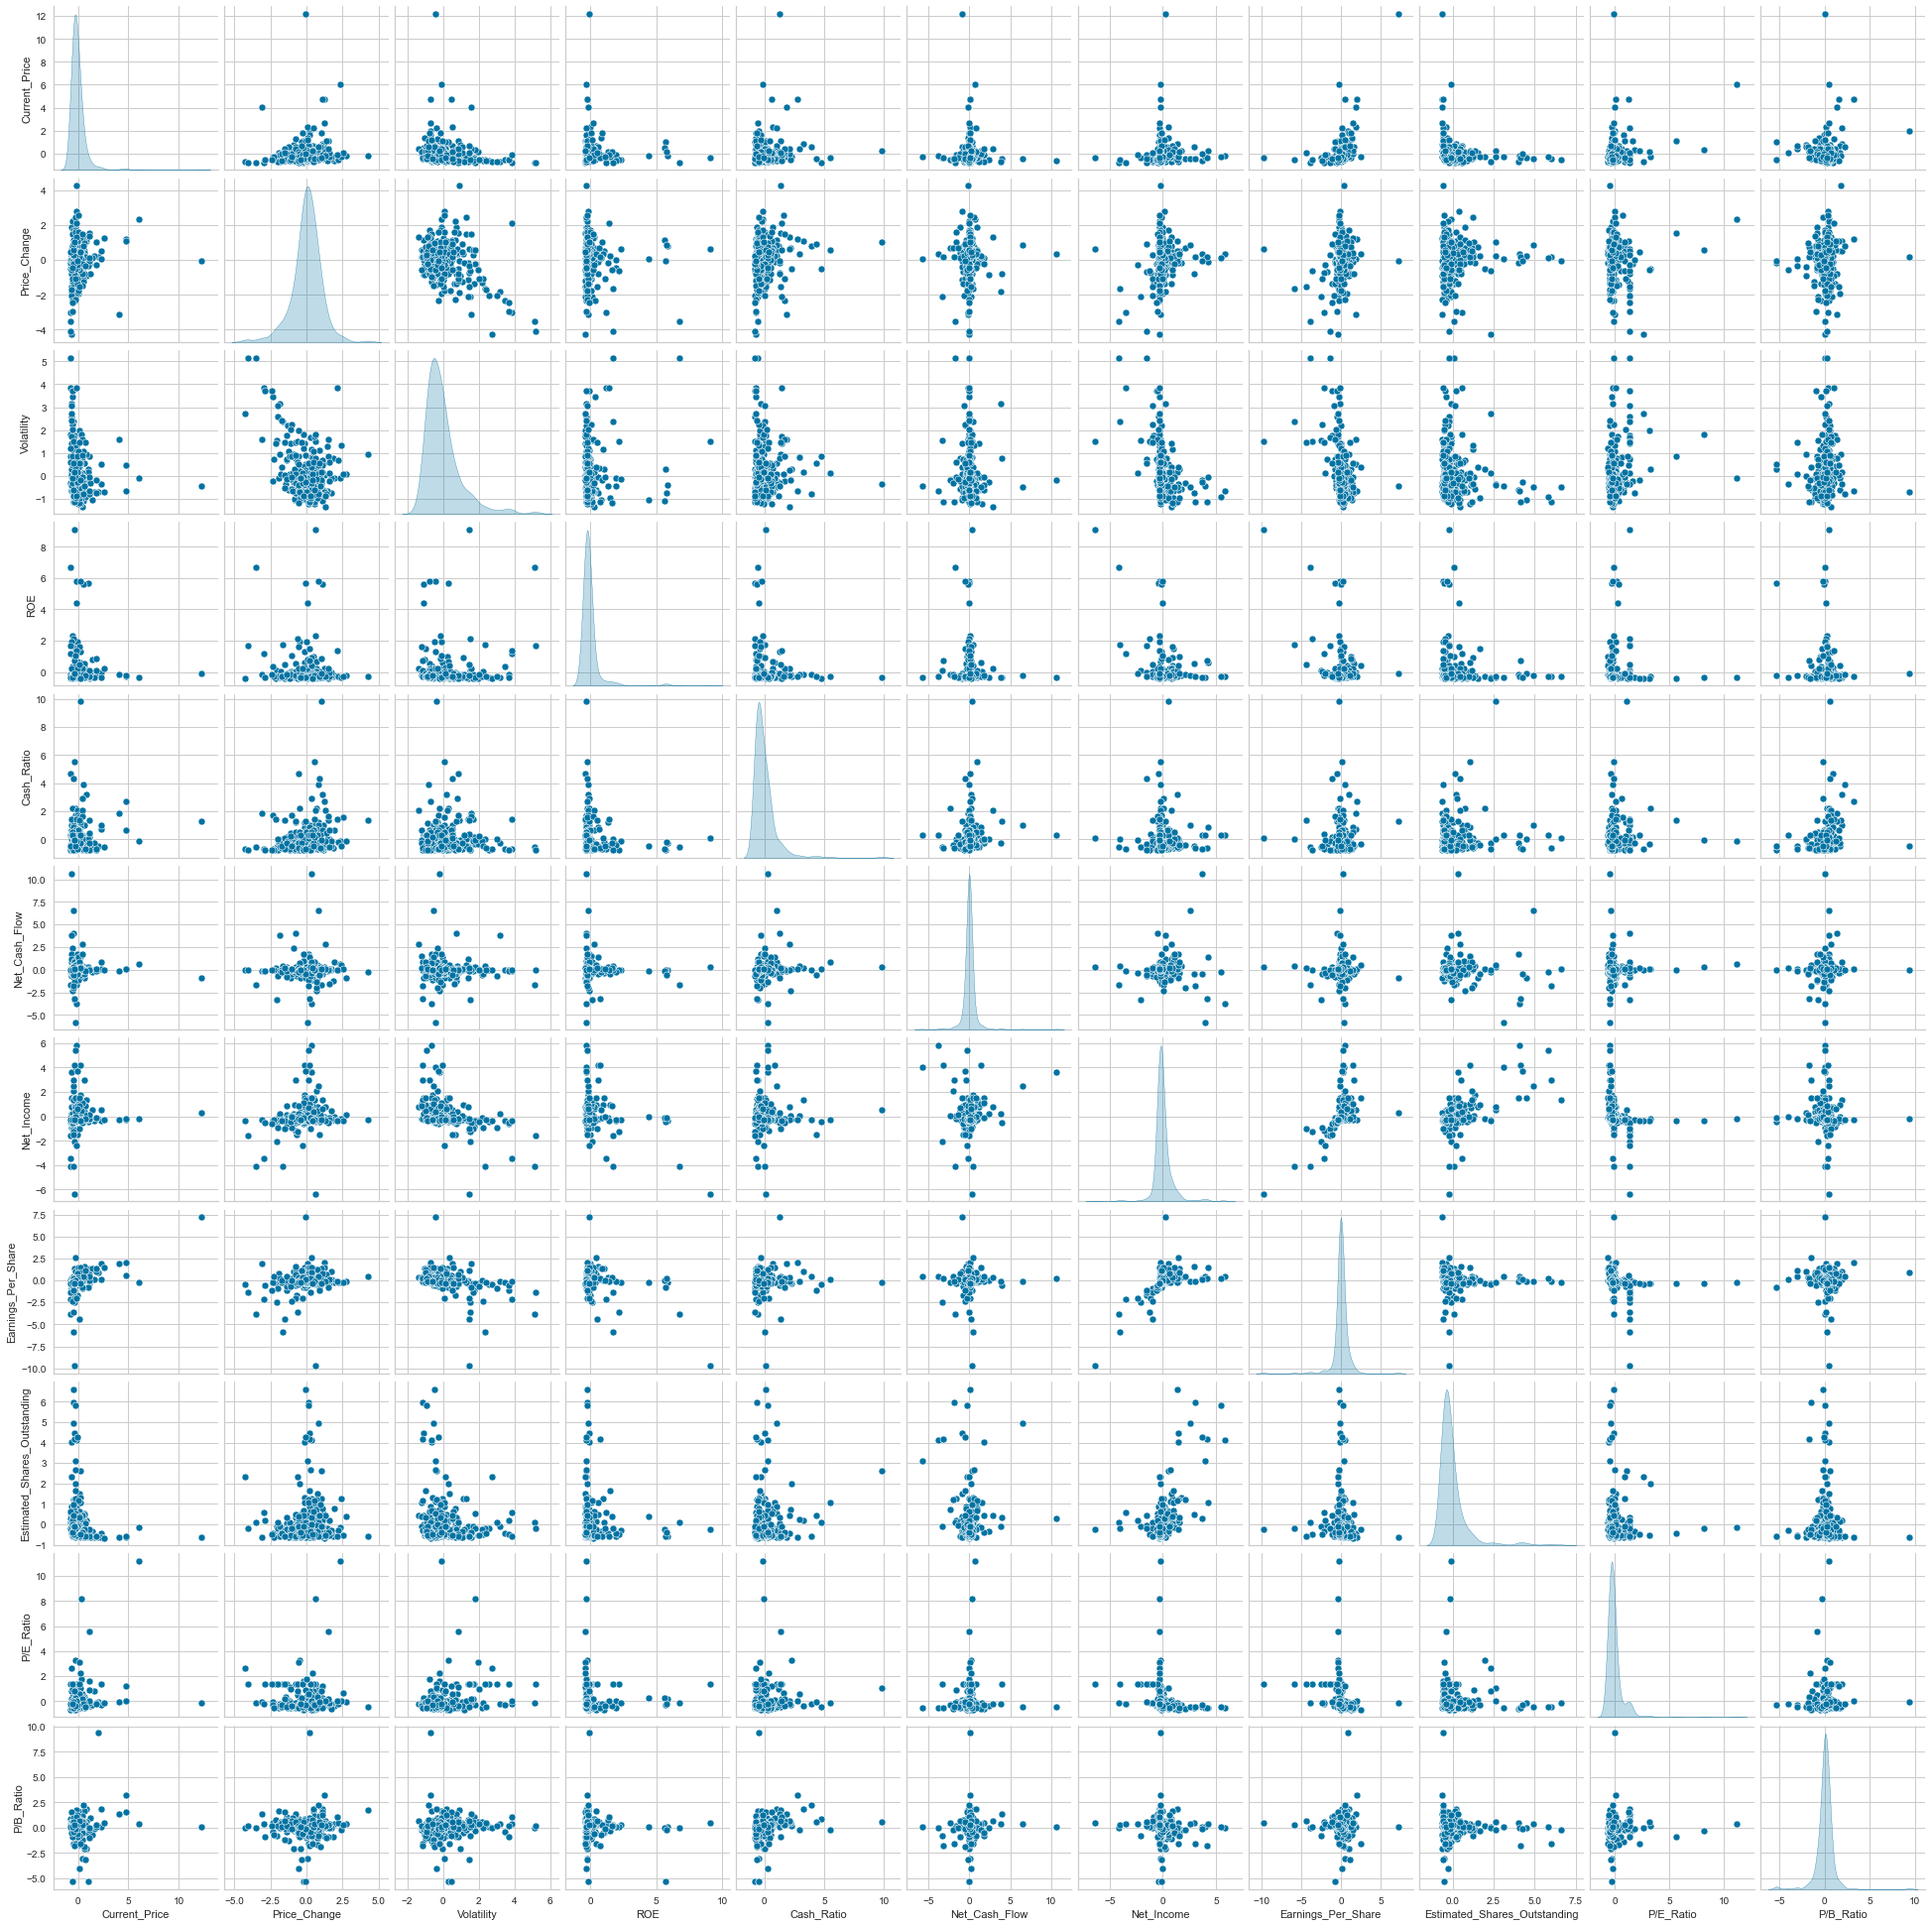

In [36]:
# Pair-plot analysis

sns.pairplot(subset_scaled_df ,diag_kind="kde");

- After feature engineering (scalar transformation), the relationship between the attributes have been maintained. However the attributes are now all on the same scale, with an average of 0, standard deviation of 1
- The data has no missing values, nor duplicate entries. Outliers have been identified, but not treated and they are assumed to be real data points & not anomalies in this context for modeling

## K Means Clustering 

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1872430756201595
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.078517766078626
Number of Clusters: 7 	Average Distortion: 2.0312771801534404
Number of Clusters: 8 	Average Distortion: 1.967334039008449


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

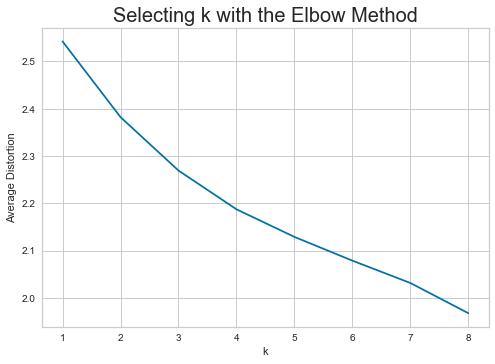

In [37]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

- Here's a breakdown of the code:

clusters=range(1,9): This sets the range of cluster numbers to try – from 1 to 8.
meanDistortions=[]: Initializes an empty list to store the average distortions for each number of clusters.
The for loop runs K-means clustering for each number of clusters (k) within the specified range:
model=KMeans(n_clusters=k): Initializes the KMeans model with k clusters.
model.fit(...): Fits the model to a subset of the data.
prediction=model.predict(...): Assigns each data point to a cluster.
The distortion (average of the squared distances from the cluster centers) is calculated and stored in the distortion variable.
meanDistortions.append(distortion): Appends the calculated distortion to the meanDistortions list.
After the loop, the distortions are printed and plotted against the number of clusters:
plt.plot(..., 'bx-'): Plots the mean distortions as a line plot with 'x' markers.
The plt.xlabel(...), plt.ylabel(...), and plt.title(...) functions label the plot axes and title.

- The plot, known as the "elbow plot," is likely showing the mean distortion on the y-axis and the number of clusters on the x-axis. It is used to find the "elbow point" where the rate of decrease of distortion sharply changes. This point indicates a suitable number of clusters to use because adding more clusters beyond this number doesn't significantly improve the fit of the model.

- In the elbow plot, you typically look for a kink or elbow-like pattern in the plot. This is where the improvements to the model (in terms of the distortion decrease) start to diminish. The optimal number of clusters is often at the elbow point of the curve, which is where increasing the number of clusters doesn't result in significantly better modeling of the data.
- Appropriate K seems to be 4 or 5

In [38]:
# Initialize an empty list to store silhouette scores
sil_score = []

# Define the range of number of clusters to be evaluated
cluster_list = list(range(2,10))

# Calculate silhouette score for each number of clusters in the range
for n_clusters in cluster_list:
    # Initialize KMeans with the current number of clusters
    clusterer = KMeans(n_clusters=n_clusters)
    
    # Fit the model and predict the cluster index for each sample
    preds = clusterer.fit_predict(subset_scaled_df)
    
    # Calculate the silhouette score for the current number of clusters
    score = silhouette_score(subset_scaled_df, preds)
    
    # Append the score to the silhouette score list
    sil_score.append(score)
    
    # Print the number of clusters and the corresponding silhouette score
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.43969639509980457)
For n_clusters = 3, silhouette score is 0.45797710447228496)
For n_clusters = 4, silhouette score is 0.4577225970476733)
For n_clusters = 5, silhouette score is 0.4034014275323858)
For n_clusters = 6, silhouette score is 0.4116463138780435)
For n_clusters = 7, silhouette score is 0.4067136315273116)
For n_clusters = 8, silhouette score is 0.3420986406985253)
For n_clusters = 9, silhouette score is 0.13651897540980598)


- The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

- The silhouette score is essential in determining the quality of the clustering process. It helps to find the optimal number of clusters by comparing the score across different numbers of clusters. The number of clusters that yields the highest silhouette score is considered as the optimal clustering solution for the dataset.

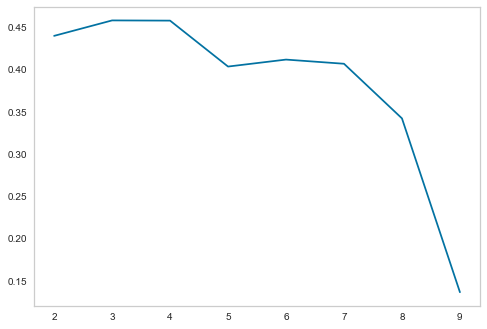

In [39]:
plt.plot(cluster_list,sil_score)
plt.grid()

- The silhouette scores start off at a certain level when there are 2 clusters and initially decrease slightly as more clusters are added.
- There's a prominent drop in the silhouette score at a certain number of clusters (which seems to be between 6 and 7 from your description).
- After the drop, the silhouette score increases slightly again.
- This sharp decrease could indicate that adding more clusters beyond this point does not provide a better cluster structure and might even result in a worse configuration. A higher silhouette score means that the data points are, on average, closer to their own cluster's center than to other clusters' centers, indicating better-defined clusters.
- From Silhouette score, 4 seems to be a good approximate for number of clusters. But 5 and 6 need to be tested too.

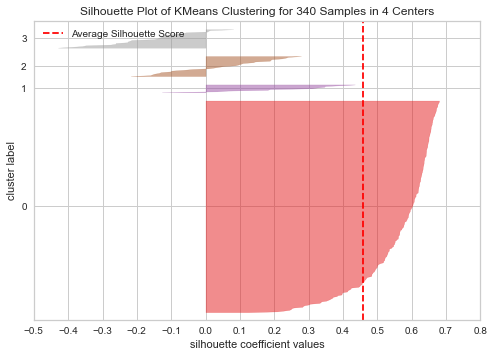

In [40]:
# Finding optimal no. of clusters with silhouette coefficients
## Create a silhouette visualizer for KMeans clustering with 4 clusters, fit the model, and show the plot
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

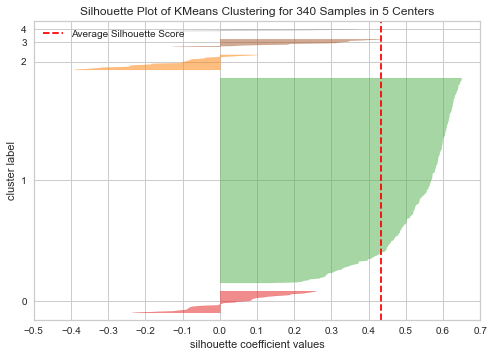

In [41]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

For the above 2 plots:
- Each plot shows the silhouette coefficients for each sample in the dataset, which range from -1 to 1. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters. A value of 1 indicates that the sample is well inside its own cluster. A negative silhouette coefficient suggests that a sample has been assigned to the wrong cluster, as it is closer to neighboring clusters than to its own.

- The vertical red dashed line represents the average silhouette score for all samples, providing a single measure of the overall quality of the clustering.

- In the plot for 4 clusters, if the silhouette coefficients are predominantly higher and the average silhouette score is close to 1, it suggests good clustering. However, if many coefficients are close to 0 or negative, it would indicate overlapping clusters.

- For the plot with 5 clusters, a similar interpretation applies. If the silhouette scores for most samples are high, it indicates that increasing the number of clusters to 5 still provides a meaningful and distinct clustering. If there is a significant decrease in silhouette scores, this might suggest that 5 clusters are too many.

- The width of each silhouette plot corresponds to the size of each cluster. A wide silhouette plot indicates a larger cluster.

- In the context of the plots you described, if the average silhouette score is higher for 4 clusters compared to 5, and if the silhouette coefficients for 4 clusters are more consistently above the average line, this would suggest that 4 clusters is a better clustering solution than 5 clusters for your dataset.

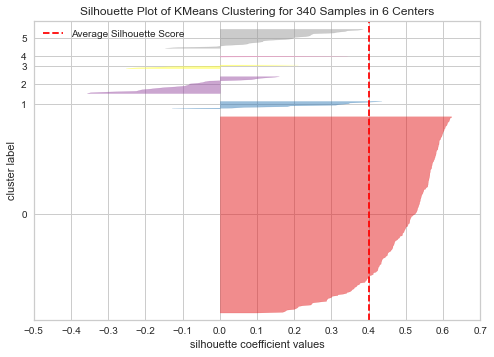

In [42]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

- The plot consists of several "silhouette" shapes, each representing a cluster (from 1 to 6 on the y-axis).
- The x-axis represents the silhouette coefficient values, which measure how similar each point in a cluster is to points in its own cluster compared to points in other clusters.
- The red dashed line shows the average silhouette score across all samples, providing an overall indicator of the cluster fit. The closer this line is to +1, the better the overall cluster fit.
- Each shape's width indicates the size of the cluster, while the shape's horizontal extent shows the range of silhouette scores within that cluster.
- Ideally, you want the silhouette scores to be as far to the right as possible (towards the value 1). Scores near to 1 suggest that the data point is well matched to its own cluster and poorly matched to neighboring clusters.
- If silhouette scores for a cluster are mostly above the average (red dashed line), it suggests that the cluster is well separated from others. Conversely, if many scores are below the average, this may indicate overlapping clusters.
- The varying thicknesses of the silhouette plots suggest varying densities and separations of the clusters.
- From the silhouette plot for 6 clusters, it seems there are variations in cluster density and separation, as indicated by the varying thickness of the silhouette shapes. The presence of clusters with parts of their silhouette below the average line could imply that not all clusters are well-separated or that some data points could belong equally well to another cluster.

## 4 clusters: 

In [43]:
# Choosing k=4 clusters
#Initialize a KMeans clustering model to partition the data into 4 clusters, with a random state set for reproducibility.
kmeans = KMeans(n_clusters=4, random_state=0)

#Fit the model to the scaled data to find clusters.
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [44]:
#Create a new column in the original dataframe to store the cluster label for each data point.
df['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [45]:
#Group the data by the cluster assignment and calculate the mean of all features within each cluster.
cluster_profile = df.groupby('K_means_segments').mean()

In [46]:
#Count the number of observations in each cluster and add this as a new column to the cluster profile.
cluster_profile['count_in_each_segments'] = df.groupby('K_means_segments')['Security'].count().values

In [47]:
#Display the cluster profile with the mean of each feature for the clusters and the count of observations in each cluster.cluster_profile

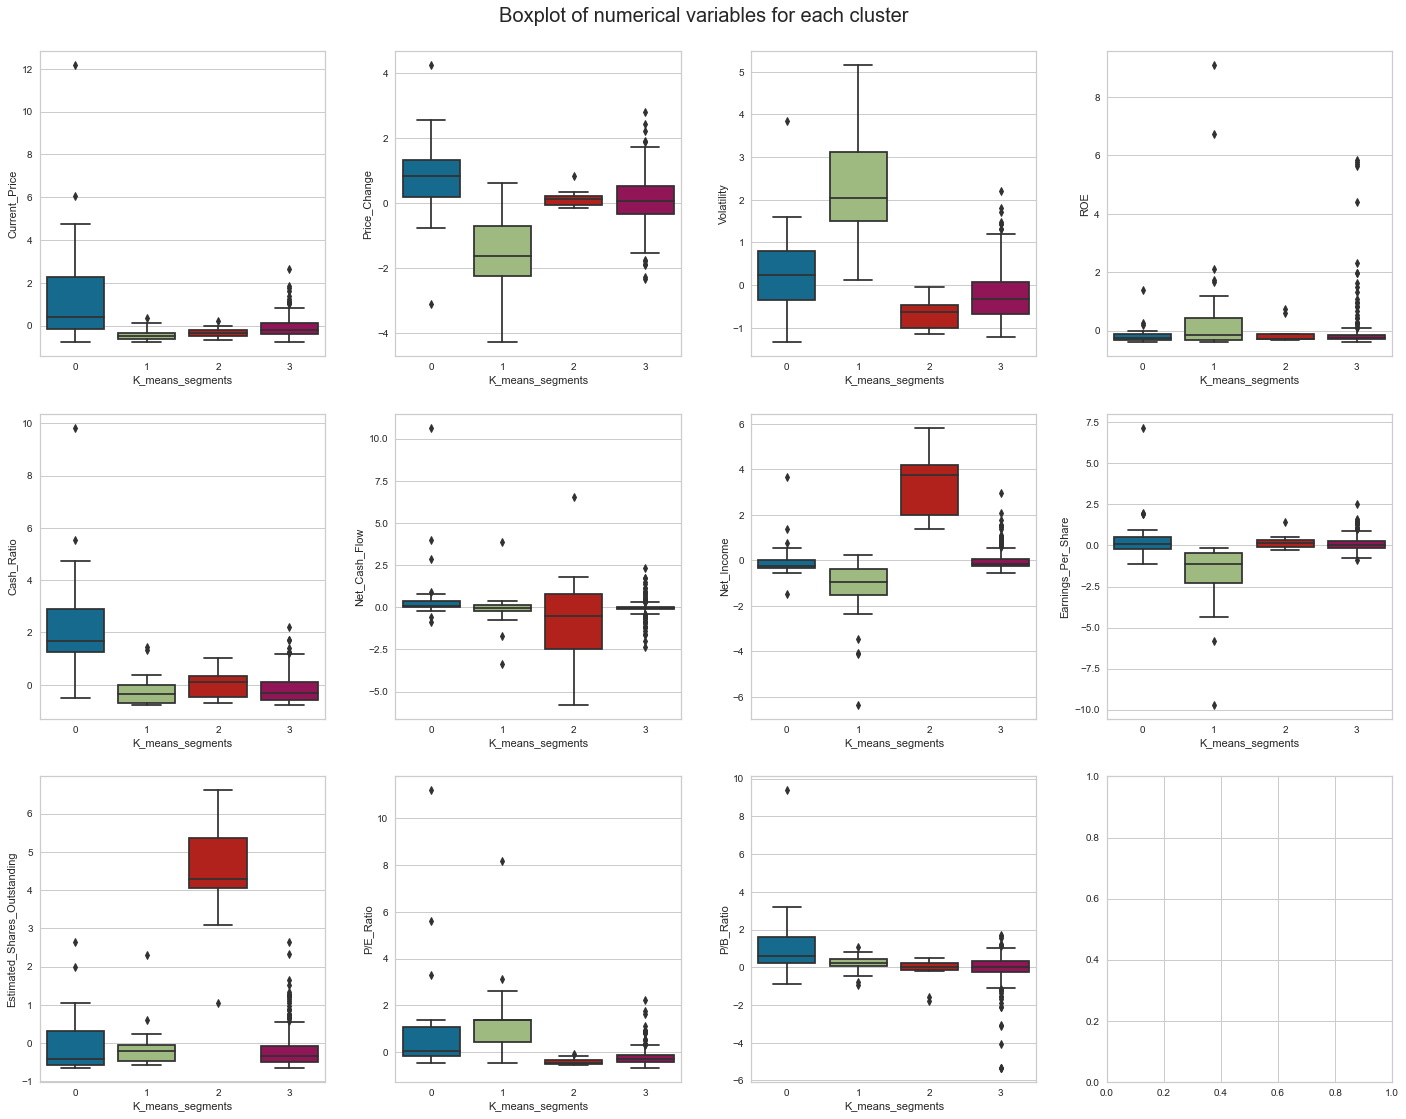

In [48]:
# Create a 3x4 grid of subplots with a specified size
fig, axes = plt.subplots(3, 4, figsize=(20, 16))
# Set a title for all subplots
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
# Initialize a counter to iterate through numerical variables
counter = 0
# Nested loop to create a boxplot on each subplot position
for ii in range(3):
    for jj in range(4):
        # Make sure we only plot for the number of numerical columns we have
        if counter < 11:
            sns.boxplot(ax=axes[ii, jj], y=subset_scaled_df[num_cols[counter]], x=subset_scaled_df['K_means_segments'])
        counter = counter + 1
# Adjust layout to prevent overlap
fig.tight_layout(pad=2.0)


Insights:

- The central line in each box represents the median value of the variable within the cluster.
- The edges of the box represent the 25th and 75th percentiles, making up the interquartile range (IQR).
- The "whiskers" extending from the boxes indicate the range of the data, typically 1.5 times the IQR from the box.
- Points outside the whiskers represent outliers.

- Cluster 0

Has about 25 different securities
This cluster has securities with very high average Current_Price of $234
As well, cluster has securities with very high Cash_Ratio of 277, high earnings per share of 6.05 and high P/B_Ratio of 14.4

- Cluster 1

Has about 27 different securities
This cluster has securities with among the lowest average Current_Price of $38 and negative average Price_Change of -15.3
As well, cluster has securities with among the highest volatility of 2.9, making them more riskier
This cluster also has the lowest Cash_Ratio of 50,low Net_Income (i.e., negative) of -3.887458e+09, low Earnings_Per_Share (i.e., negative) of -9.4

- Cluster 3

Has the majority of securities at 277
This cluster has securities that lie in between Cluster 0 & Cluster 1 i.e, intermediate Current_Price of $72, intermediate Price_Change of 5.066 (neither positive & high like cluster 0 nor negative and high like cluster 2), and intermediate volatility

- Cluster 2

Has only 11 different securities
This cluster is very similar to Cluster 3 in it's behavior but with two striking differences:
Has securities with some of the highest average Net_Income of 1.483309e+10 (almost 10 times of those in Cluster 3)
Has securities with some of the highest Estimated_Shares_Outstanding of 4.298827e+09 (almost 10 times of those in Cluster 3)

Clusters 3 and 2 are the safe clusters, with clusters 2 containing more exclusive securities. Clusters 0 and 1 are more riskier securities, former being high performing and later historically speaking low performing

In [49]:
# Comparing cluster vs. GICS_Sector
# Perform cross-tabulation between 'GICS_Sector' and 'K_means_segments' to count the frequency each sector appears in each cluster
# Apply styling to highlight the maximum value in each row (sector) with light green color
pd.crosstab(df.GICS_Sector, df.K_means_segments).style.highlight_max(color='lightgreen', axis=0)


K_means_segments,0,1,2,3
GICS_Sector,,,,
Consumer Discretionary,6,0,1,33
Consumer Staples,1,0,1,17
Energy,1,22,1,6
Financials,1,0,3,45
Health Care,9,0,2,29
Industrials,0,1,0,52
Information Technology,5,3,1,24
Materials,0,1,0,19
Real Estate,1,0,0,26


- Among the securities in Cluster 0, majority are Health Care, followed by Consumer Discretionary & Informational Technology
- Cluster 1 is dominated by securities belonging to Energy division
- Cluster 2 is predominantly Financials
- Cluster 3 is diversified with Securities predominantly belonging to Industrials followed by Financials, Consumer Discretionary, Real Estate & Informational Technology

## Hierarchical Clustering

In [73]:
# Define lists of distance metrics and linkage methods for hierarchical clustering
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
linkage_methods = ["single", "complete", "average", "weighted"]

# Initialize variables to store the highest cophenetic correlation and corresponding distance metric and linkage method
high_cophenet_corr = 0
high_dm_lm = [0, 0]

# Iterate over all combinations of distance metrics and linkage methods
for dm in distance_metrics:
    for lm in linkage_methods:
        # Perform hierarchical clustering with the current distance metric and linkage method
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        
        # Compute the cophenetic correlation coefficient for the clustering
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        
        # Print the cophenetic correlation for the current combination of distance metric and linkage method
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}".format(
                dm.capitalize(), lm, c
            )
        )
        
        # Update the variables if the current cophenetic correlation is the highest so far
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm


Cophenetic correlation for Euclidean distance and single linkage is 0.9361573137155428
Cophenetic correlation for Euclidean distance and complete linkage is 0.8912171674298116
Cophenetic correlation for Euclidean distance and average linkage is 0.9402170033461534
Cophenetic correlation for Euclidean distance and weighted linkage is 0.891382329460296
Cophenetic correlation for Chebyshev distance and single linkage is 0.9187458528921174
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8228080389704356
Cophenetic correlation for Chebyshev distance and average linkage is 0.9374227213554178
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9145555208649849
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9428343342402943
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7430655304868364
Cophenetic correlation for Mahalanobis distance and average linkage is 0.944230897885761
Cophenetic correlation for

In [51]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.946403836884538, which is obtained with Euclidean distance and average linkage


In [52]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9304469769832865
Cophenetic correlation for complete linkage is 0.8559480642212798
Cophenetic correlation for average linkage is 0.946403836884538
Cophenetic correlation for centroid linkage is 0.9494262703881242
Cophenetic correlation for ward linkage is 0.7436374975239648
Cophenetic correlation for weighted linkage is 0.7508819056084053


In [53]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9494262703881242, which is obtained with centroid linkage


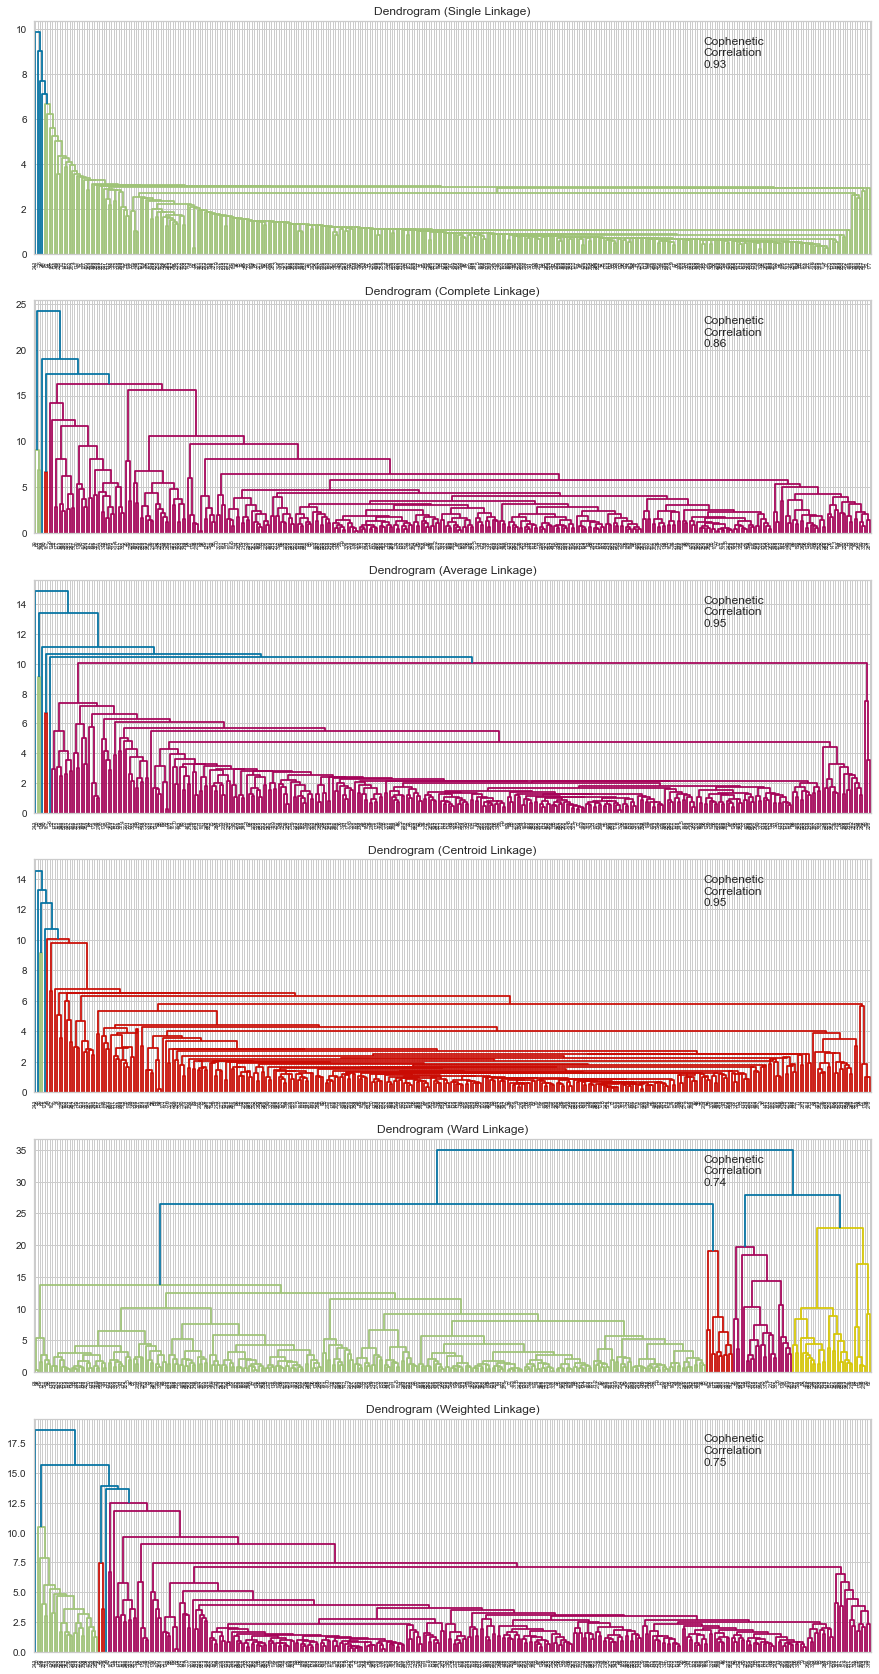

In [54]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

- Cophenetic correlation is highest with eucledian distance & average or centroid linkages
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage

In [55]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [56]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [57]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [58]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)

In [59]:
cluster_profile

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-3.319732e+07,1.538075e+09,2.88527,5.605050e+08,32.441706,-2.174921,2.630631,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,1.675550e+10,1.365400e+10,3.29500,2.791829e+09,13.649696,1.508484,1.000000,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.81500,5.195740e+08,60.748608,1.565141,1.000000,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,5.920000e+08,3.669000e+09,1.31000,2.800763e+09,79.893133,5.884467,0.000000,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1.671386e+09,2.551360e+09,50.09000,5.093552e+07,25.453183,-1.052429,0.000000,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,9.088500e+07,5.965410e+08,8.91000,6.695185e+07,31.040405,129.064585,0.000000,1


- There are 5 clusters, each with 2, 2, 1, 1, and 1 securities. This clustering does not look good as the clusters do not have enough variability
- Re-trying using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be the appropriate number of clusters from the dendrogram for Ward linkage

In [60]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

In [61]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [62]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [63]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)

In [64]:
cluster_profile

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,46.558126,-11.798670,2.617878,178.750000,50.250000,4.349716e+07,-3.197472e+09,-7.785312,4.732895e+08,72.496532,-0.780467,1.281250,32
1,71.846974,4.953643,1.392784,25.117216,53.831502,1.197788e+06,1.557674e+09,3.691044,4.439183e+08,23.583804,-3.087957,2.996337,273
2,229.579357,14.049986,1.735216,25.423077,268.423077,1.712688e+09,1.981882e+09,5.946923,7.219242e+08,84.216911,13.114240,0.115385,26
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3.040667e+09,1.484844e+10,3.435556,4.564960e+09,15.596051,-6.354193,2.000000,9


- Now, the clusters appear to have more variability

In [65]:
# let's see the names of the securities in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Security"].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 273 Securities in cluster 1 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 '

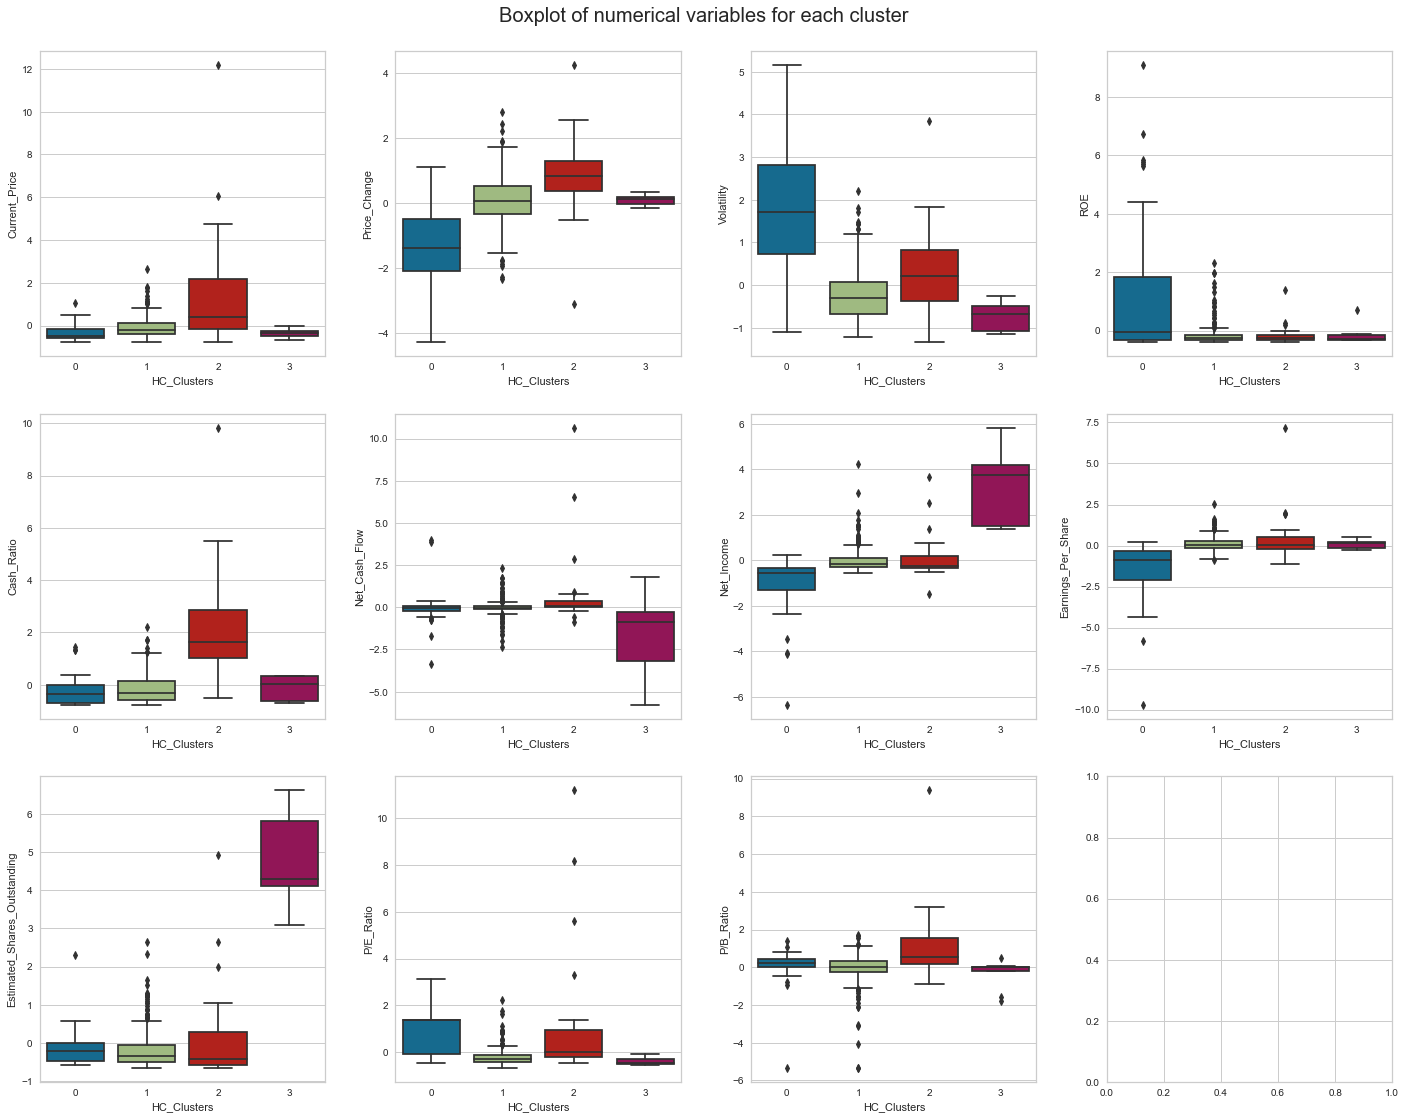

In [66]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=subset_scaled_df[num_cols[counter]],x=subset_scaled_df['HC_Clusters'])
        counter = counter+1

fig.tight_layout(pad=2.0)

Insights
Although, minor differences here and there, groupings obtained with Hierarchical clustering using Eucledian distance & Ward linkage is similar to the one obtained using K-Means clustering!

- Cluster 0 of Hierarchical clustering
  Similar to cluster 1 of K-Means clustering
- Cluster 1 of Hierarchical clustering
  Similar to cluster 3 of K-Means clustering
- Cluster 2 of Hierarchical clustering
  Similar to cluster 0 of K-Means clustering
- Cluster 3 of Hierarchical clustering 
  Similar to cluster 2 of K-Means clustering

In [67]:
# Comparing cluster vs. GICS_Sector

pd.crosstab(df.GICS_Sector, df.HC_Clusters).style.highlight_max(color = 'lightgreen', axis = 0)

HC_Clusters,0,1,2,3
GICS_Sector,,,,
Consumer Discretionary,1,32,6,1
Consumer Staples,2,15,1,1
Energy,23,6,0,1
Financials,1,44,1,3
Health Care,0,30,9,1
Industrials,2,51,0,0
Information Technology,2,24,7,0
Materials,1,19,0,0
Real Estate,0,26,1,0


- The results are quite similar to as was observed with K-Means clustering

## K-means vs Hierchical clustering

In [68]:
# Comparing Hierarchical cluster vs. K-means  cluster

pd.crosstab(df.K_means_segments, df.HC_Clusters).style.highlight_max(color = 'lightgreen', axis = 0)The 4 clusters as identified by K-Means and Hierarchical Clustering are able to group (26+272+24+9 i.e.,) 331 securities out of 340 securities in an identical fashion. PCA has been performed to visualize the clusters from the two algorithms in 2 dimensional space

HC_Clusters,0,1,2,3
K_means_segments,,,,
0,1,0,24,0
1,26,0,1,0
2,0,1,1,9
3,5,272,0,0


- The 4 clusters as identified by K-Means and Hierarchical Clustering are able to group (26+272+24+9 i.e.,) 331 securities out of 340 securities in an identical fashion. PCA has been performed to visualize the clusters from the two algorithms in 2 dimensional space

In [69]:
# PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [70]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.38933325456234824

- The first two principal components explain 38.9% of the variance in the data

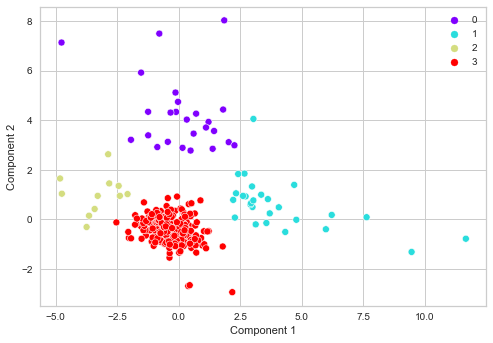

In [71]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

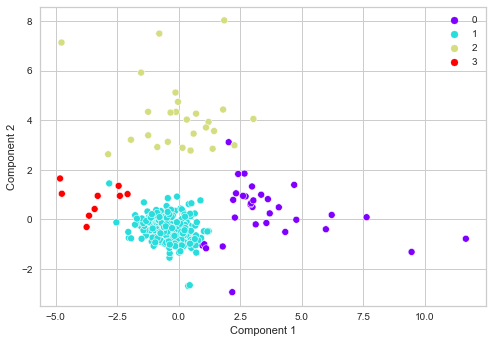

In [72]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- The 4 clusters are well separated, with 1 cluster containing majority of data points and other clusters capturing the outliers
- While there are subtle differences in the plots obtained with K-Means clustering & Hierarchical clustering, broadly, there are more similarities than disimilarities in the obtained clusters

Insights
Exploratory Data Analysis
Current_Price of stocks, and Estimated_Shares_Outstanding across securities for all sectors is right skewed (with several positive outliers)

Health Care and Financial sectors have seen some of the highest positive Price_Change in the last 13 weeks, making them favorable to investors

Informational Technology and Financial sectors have some of the highest Cash_Ratios making them favorable more so than other sectors

Real Estate sector has seen minimum variation in Price_Change & minimum variation in Cash_Ratio across securities it encompasses making them a safer investment choice for investors

Energy sector has some of the highest variance in Price_Change across securities it encompasses, being more volatile and riskier for investors. However, this sector has securities with high P/E_Ratios. This indicates an investor is willing to invest more in a single share of a company in Energy sector per dollar value of its earnings as opposed to securities in any other sectors

Clustering Profiles
Out of 340 securities in our data set, both clustering methods clustered 331 securities in a similar fashion with 9 securities being clustered differently. The industry segregation into clusters yielded similar results across both algorithms. PCA performed for both clustering techniques yielded similar cluster densities in 2D space

One cluster (25+securities) was identified as very aggressive (& high performing) belonging predominantly to Health Care followed by Consumer Discretionary and Information Technology sectors

Another cluster (25+securities) was identified as very aggressive (but historically low performing) belonging predominantly to Energy sector

Another cluster (~10securities) was identified as moderately aggressive (& high performing) belonging predominantly to Financials sector

Finally, a major cluster (270+securities) was identified as mildly aggressive & safe investment option. This cluster is diversified with securities predominantly belonging to Industrials, followed by Financials, Consumer Discretionary, Real Estate, & Informational Technology sectors

Recommendations
Securities were segregated into 4 different clusters identifying very aggressive (high & low performing), moderately aggressive (& high performing) and mildly aggressive options. This is important in an effort to split the stocks across investments that are diversified, enabling one to maximize earnings in any market condition
However, it is important to keep in mind that stock market is often volatile, and past indicators may not always indicate future trends. Dynamic clustering (as more data is added each day) & movement of stocks across cluster groups due to changing market conditions needs to be further analyzed for making better predictions